In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Engineering The First Feature 

The first feature is Average Pixel Used to draw the number in the image. The algorithm below iterates through every row in the data set and sums up all the row's
pixels(collumns) which have a value bigger than 0 (val[col].unique() > 0) and after that devides the sum by the total number of pixels (784)

In [4]:
train['avg_pixel_used'] = np.nan

def avg_pix_usd(data, col_name):

    for i in range(len(data)):

        val = data.iloc[[i], 1:-1]
        counter = 0

        for col in val.columns:

            if val[col].unique() > 0:

                counter += 1

            else: 
                continue

        data.loc[[i], col_name] = counter/784

In [5]:
avg_pix_usd(train, 'avg_pixel_used')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,avg_pixel_used
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.123724
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.312500
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.100765
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.144133
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.331633


### Engineering The Second Feature 

The second feature is Maximum Pixel Value. Firstly, the algorithm below iterates through every row in the data set and reshapes it into a 28x28 grayscaled image and scales all the pixels to be between 0 and 1 (pixel/255.0). Secondly, it divides the image into 4 sub images and takes the average pixel value for each sub image. Lastly, the maximum pixel value is chosen (like pooling in CNN)

In [6]:
train['max_pixel_val'] = np.nan

def max_val(data, col_name):
    
    img = data.iloc[:, 1:-2].values.reshape(-1, 28, 28, 1)/255.0
    
    for i in range(len(img)):
        
        sub_img1 = np.average(img[i][:14,:14,0])
        sub_img2 = np.average(img[i][14:,:14,0])
        sub_img3 = np.average(img[i][:14,14:,0])
        sub_img4 = np.average(img[i][14:,14:,0])

        maximum = np.max([sub_img1,sub_img2,sub_img3,sub_img4])

        data.loc[[i], col_name] = maximum

In [7]:
max_val(train, 'max_pixel_val')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,avg_pixel_used,max_pixel_val
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.123724,0.156723
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.312500,0.232733
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.100765,0.085214
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.144133,0.117827
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.331633,0.270008


### Engineering The Third Feature 

The third feature is Average Pixel Value of the whole image. The algorithm below reshapes each row into a 28x28 pixel grayscale image and then iterates through each image in the data set and takes the average pixel value of that image and adds it to the new column.

In [8]:
train['avg_pixel_val'] = np.nan

def avg_pixVal(data, col_name):
    
    images = data.iloc[:, 1:-3].values.reshape(-1,28,28,1)/255.0
    
    for i in range(len(data)):
        
        data.loc[[i], 'avg_pixel_val'] = np.average(images[i][:,:,0])

In [9]:
avg_pixVal(train, 'avg_pixel_val')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,avg_pixel_used,max_pixel_val,avg_pixel_val
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.123724,0.156723,0.083278
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.312500,0.232733,0.223134
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.100765,0.085214,0.067152
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.144133,0.117827,0.075155
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.331633,0.270008,0.255567


## Train Test Split

In [10]:
'''
setting ['label'] to categorical data type
'''
train['label'] = train['label'].astype('category', copy=False)

In [11]:
'''
Creating X and y variables of the training data set and another variable for the testing data set
for future machine learning manipulations (scaling, dimension reduction, splitting to train & val sets)
'''
X = train.iloc[:, 1:].values
y = train.iloc[:, [0]].values

In [12]:
'''
feature scaling
'''
X[:, :-3] = X[:, :-3]/255.0

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [14]:
'''
creating training set and testing set. The training set is 80% of the whole dataset and the testing set is 10% of the dataset
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
'''
checking for the shape of the training set and testing set
'''
print(X_train.shape , " ", y_train.shape)
print(X_test.shape, " ", y_test.shape)

(33600, 787)   (33600, 1)
(8400, 787)   (8400, 1)


### Principal Component Analysis (PCA)

In [16]:
'''
creating a PCA object with 35 components and applying it on the 784 pixel features
'''
pca = PCA(n_components=35)
components = pca.fit_transform(X_train[:, :-3])

Text(0.5, 1.0, 'Explained Varience by each PCA component')

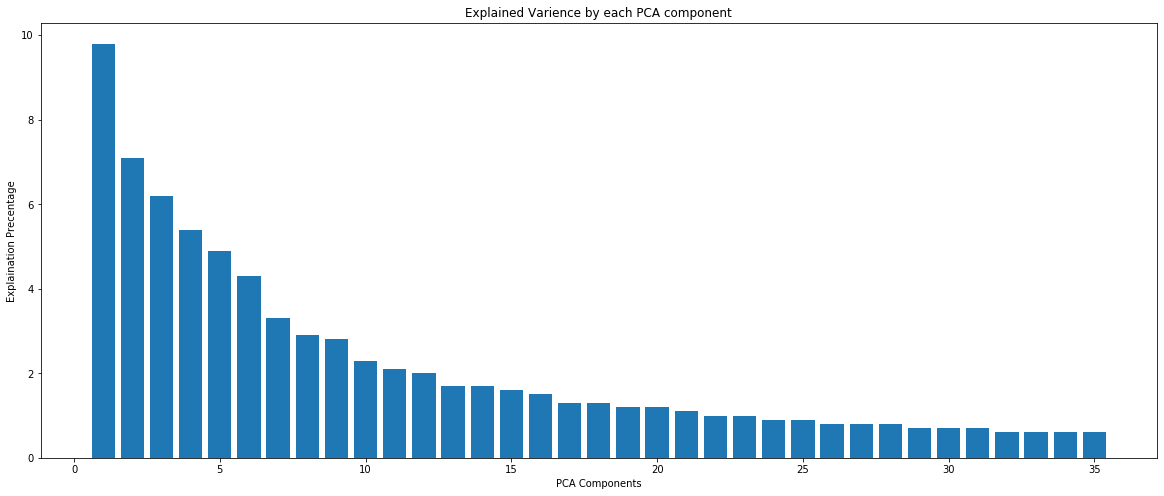

In [17]:
'''
creating a barplot 
'''
plt.figure(figsize=(20,8))
plt.bar(x=range(1, len(np.round(pca.explained_variance_ratio_*100, decimals=1))+1), 
                height=(np.round(pca.explained_variance_ratio_*100, decimals=1)))
plt.ylabel('Explaination Precentage')
plt.xlabel('PCA Components')
plt.title('Explained Varience by each PCA component')

In [18]:
print('Total Explained Variance: ' + str(int(np.round(pca.explained_variance_ratio_*100, decimals=1).sum())) +'%') 

Total Explained Variance: 76%


In [22]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [25]:
'''
creating a column for each pca component
'''
for x in range(components.shape[1]):
    X_train['PCA'+str(x)] = components[:, [x]]

X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.518705,-0.255194,1.188498,0.213524,-0.979935,-0.414791,0.052884,0.475351,0.551441,-0.422901
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.931628,-0.325924,0.599229,-0.281621,-0.490058,-2.125160,0.468373,-0.273999,0.838204,-0.551187
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.304158,0.751103,0.978725,0.226956,0.025244,0.518779,0.039729,-0.035209,-0.090201,0.361126
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.190353,-1.421142,0.244268,-1.121640,0.168309,-0.368058,0.186013,-0.452723,-0.130818,-1.154787
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.846164,0.934685,-0.302984,0.472454,0.480836,0.426905,0.259880,0.481973,0.242440,-0.456740


In [26]:
'''
removing all the pixels features from pixel0 - pixel784
'''
X_train.drop(X_train.columns[:784], axis=1, inplace=True)
X_train.head()

,784,785,786,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,...,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34
0,0.168367,0.134134,0.101040,-0.888648,1.199586,1.635983,2.548937,1.139561,-0.565574,-0.330942,...,0.518705,-0.255194,1.188498,0.213524,-0.979935,-0.414791,0.052884,0.475351,0.551441,-0.422901
1,0.197704,0.155862,0.124265,0.150337,-1.808202,0.393758,-3.466837,-1.864868,-0.363575,-0.962966,...,-0.931628,-0.325924,0.599229,-0.281621,-0.490058,-2.125160,0.468373,-0.273999,0.838204,-0.551187
2,0.179847,0.157863,0.107238,-1.198009,-1.379104,-3.769991,-0.017879,-0.010931,-1.226397,-1.142372,...,0.304158,0.751103,0.978725,0.226956,0.025244,0.518779,0.039729,-0.035209,-0.090201,0.361126
3,0.177296,0.180932,0.127211,0.324918,4.340765,-0.834243,0.141734,0.408249,1.102000,-1.547594,...,-0.190353,-1.421142,0.244268,-1.121640,0.168309,-0.368058,0.186013,-0.452723,-0.130818,-1.154787
4,0.141582,0.129732,0.101436,-2.691701,2.547747,-0.657865,-1.324497,-1.196711,1.126006,2.383656,...,-0.846164,0.934685,-0.302984,0.472454,0.480836,0.426905,0.259880,0.481973,0.242440,-0.456740


### Applying PCA on the validation set (testing set) 

In [27]:
components_test = pca.transform(X_test.iloc[:, :-3])

In [28]:
for x in range(components_test.shape[1]):
    X_test['PCA'+str(x)] = components_test[:, [x]]
    
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.375569,0.513557,0.176121,-0.797132,0.618570,-0.120804,0.352276,-0.280329,0.139504,0.775507
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.122944,0.263980,0.043197,0.022337,-0.097003,-0.128627,-0.846517,0.521999,0.143401,0.035223
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.568390,0.721851,0.660681,0.388810,0.031647,0.667175,-0.399324,-0.656125,0.661258,0.051655
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.892841,-0.246109,0.141974,-0.133555,0.272479,0.544592,-1.024361,-0.333976,0.804063,0.117203
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000555,0.769288,0.393986,1.073345,0.122234,-0.039182,-0.629206,-1.052968,0.136367,0.134963


In [29]:
X_test.drop(X_test.columns[:784], axis=1, inplace=True)
X_test.head()

,784,785,786,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,...,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34
0,0.177296,0.142977,0.110894,-1.700389,-1.088245,0.803851,-0.044090,1.670558,0.755111,0.659060,...,-0.375569,0.513557,0.176121,-0.797132,0.618570,-0.120804,0.352276,-0.280329,0.139504,0.775507
1,0.080357,0.077911,0.044853,-3.669135,-1.633222,-0.105634,1.095215,-2.267120,-0.140504,-0.120054,...,0.122944,0.263980,0.043197,0.022337,-0.097003,-0.128627,-0.846517,0.521999,0.143401,0.035223
2,0.164541,0.138615,0.109489,-2.103878,2.405601,-0.270904,-2.373968,0.264608,-1.143482,0.613035,...,0.568390,0.721851,0.660681,0.388810,0.031647,0.667175,-0.399324,-0.656125,0.661258,0.051655
3,0.179847,0.161164,0.118923,-0.340916,3.118400,-1.762115,-1.280599,-0.442106,-0.710253,-0.805485,...,0.892841,-0.246109,0.141974,-0.133555,0.272479,0.544592,-1.024361,-0.333976,0.804063,0.117203
4,0.196429,0.170448,0.122709,-0.841828,-0.420326,1.430903,-2.216488,0.998004,0.410986,-1.539599,...,0.000555,0.769288,0.393986,1.073345,0.122234,-0.039182,-0.629206,-1.052968,0.136367,0.134963


In [31]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [32]:
X_train.to_csv('Engineered_X_train.csv', index=False)
X_test.to_csv('Engineered_X_test.csv', index=False)
y_train.to_csv('X_train_label.csv', index=False)
y_test.to_csv('X_test_label.csv', index=False)